Imports, options, load marathon data


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the option to display all columns
pd.set_option('display.max_columns', None)
# Set the option to display more width (scroll to the right)
pd.set_option('display.width', 1000)

# import data file:
df_marathon = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx602-examples/refs/heads/main/data/2025_chicago_results.csv", index_col="BIB")

print('df_marathon.columns:', df_marathon.columns)


df_marathon.columns: Index(['name_(ctz)', 'short', 'gender', 'city,_state', 'bib', 'division', 'start_time', 'place_overall', 'place_gender', 'place_division', 'last_split', '05k', '10k', '15k', '20k', 'half', '25k', '30k', 'mile_20', 'mile_21', '35k', 'mile_22', 'mile_23', 'mile_24', '40k', 'mile_25', 'mile_25.2', 'finish', 'half_2', 'finish_tod', '05k_hours', '10k_hours', '15k_hours', '20k_hours', 'half_hours', '25k_hours', '30k_hours', 'mile_20_hours', 'mile_21_hours', '35k_hours', 'mile_22_hours', 'mile_23_hours', 'mile_24_hours', '40k_hours', 'mile_25_hours', 'mile_25.2_hours', 'finish_hours', 'half_2_hours', '05k_pace', '10k_pace', '15k_pace', '20k_pace', '25k_pace', '30k_pace', '35k_pace', '40k_pace', 'splits_mean', 'splits_std', 'start_place', 'finish_place', 'num_passed'], dtype='object')


Exploratory data analysis:
- explore some columns/values
- use groups of columns together

In [3]:
columns = ['name_(ctz)', 'gender', 'division', 'place_overall', 'finish']
time_columns = ['05k_hours', '10k_hours', '15k_hours', '20k_hours',
       'half_hours', '25k_hours', '30k_hours', 'mile_20_hours',
       'mile_21_hours', '35k_hours', 'mile_22_hours', 'mile_23_hours',
       'mile_24_hours', '40k_hours', 'mile_25_hours', 'mile_25.2_hours',
       'finish_hours', 'half_2_hours']
pace_columns = ['05k_pace', '10k_pace', '15k_pace',
       '20k_pace', '25k_pace', '30k_pace', '35k_pace', '40k_pace']




Exploratory analysis: scatter plots

Add: coloring by category

      gender    color
BIB                  
10178    Man  #1f77b4
24707    Man  #1f77b4
48088    Man  #1f77b4
11803  Woman  #ff7f0e
40829    Man  #1f77b4
54056  Woman  #ff7f0e
50562    Man  #1f77b4
8618   Woman  #ff7f0e
45284  Woman  #ff7f0e
20302    Man  #1f77b4


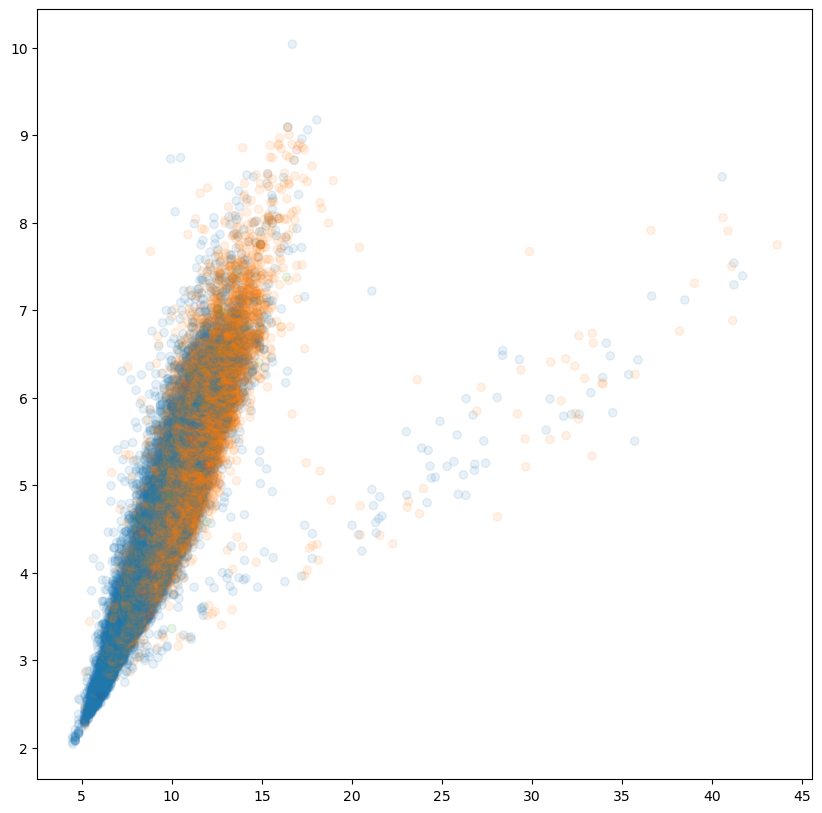

In [4]:
## basic scatter plot without coloring
# print(df_marathon[time_columns].sample(10))
# plt.scatter(df_marathon['05k_pace'], df_marathon['finish_hours'], alpha=0.1)
# plt.title("5k pace vs finish times")
# plt.xlabel('5k pace (min)')
# plt.ylabel('finish time (hrs)')

## second example with category-based coloring:
choices = df_marathon['gender'].unique()
colors = dict(zip(choices, plt.rcParams['axes.prop_cycle'].by_key()['color']))
# print(colors)
df_marathon['color'] = df_marathon['gender'].map(colors)
print(df_marathon[['gender', 'color']].sample(10))

plt.figure(figsize=(10, 10))
plt.scatter(df_marathon['05k_pace'], df_marathon['finish_hours'], 
            alpha=0.1, color=df_marathon['color'])



Correlation and heatmap

Text(0.5, 1.0, '5k pace correlation heatmap')

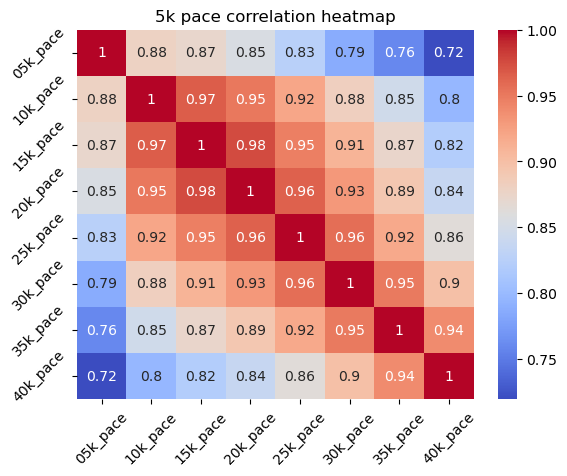

In [ ]:

# correlation matrix of paces:
c = df_marathon[pace_columns].corr()
print(c)
plt.matshow(c)

# import seaborn
# ax = seaborn.heatmap(c, annot=True, cmap="coolwarm")
# ax.tick_params(axis='x', labelrotation=45)
# ax.tick_params(axis='y', labelrotation=45)
# plt.title("5k pace correlation heatmap")

Grouping data by gender

In [7]:
grouped = df_marathon.groupby('gender')
# print(grouped['finish_hours'].describe())
# grouped['finish_hours'].mean().plot(kind='bar')
# plt.title('finish time by category')
# plt.ylabel('finish time in hours')

# histogram by group
# grouped['finish_hours'].hist(bins=200, alpha=0.8)

# each 5k pace
# grouped[pace_columns].mean().plot(kind='bar')

Grouping data by gender, division

bib                                                                            place_overall                                                                            place_gender                                                                           place_division                                                                  05k_hours                                                                       10k_hours                                                                       15k_hours                                                                       20k_hours                                                                       half_hours                                                                       25k_hours                                                                       30k_hours                                                                       mile_20_hours                                                              \
                          count          mean           std      min       25%      50%       75%      max         count          mean           std      min       25%      50%       75%      max        count          mean          std      min       25%      50%       75%      max          count         mean          std  min      25%     50%      75%     max     count      mean       std       min       25%       50%       75%       max     count      mean       std       min       25%       50%       75%       max     count      mean       std       min       25%       50%       75%       max     count      mean       std       min       25%       50%       75%       max      count      mean       std       min       25%       50%       75%       max     count      mean       std       min       25%       50%       75%       max     count      mean       std       min       25%       50%       75%       max         count      mean       std       min       25%       50%       75%   
gender     division                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
Man        19 and under   120.0  24394.291667  16235.131517   1007.0  21221.25  23631.5  24431.50  51042.0         120.0  29770.416667  16093.358855    353.0  16807.50  33639.0  43177.00  54139.0        120.0  18221.858333  8473.485388    335.0  12110.00  21003.5  25196.25  29491.0          120.0    60.500000    34.785054  1.0    30.75    60.5    90.25   120.0     120.0  0.483838  0.107080  0.293611  0.407708  0.474722  0.526111  0.788611     120.0  0.974440  0.215391  0.593333  0.824583  0.947500  1.069167  1.577500     120.0  1.448382  0.310564  0.887222  1.227292  1.428750  1.588472  2.294444     120.0  1.936894  0.418159  1.183333  1.624861  1.904861  2.121389  3.218333      120.0  2.052701  0.447027  1.249167  1.730556  2.017917  2.251250  3.398611     120.0  2.471935  0.562448  1.481111  2.076875  2.404444  2.797222  4.191944     118.0  3.040106  0.720178  1.786111  2.561875  3.001944  3.473819  5.618889         119.0  3.293957  0.780746  1.922778  2.766667  3.223056  3.733472   
           20-24        

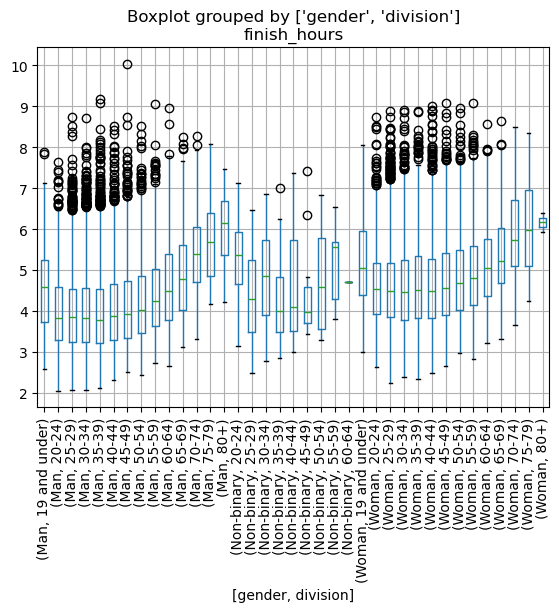

In [51]:
# box plot by categories
df_marathon.boxplot(column=['finish_hours'],
                    by=['gender', 'division'],
                    rot=90)
grouped=df_marathon.groupby(['gender', 'division'])
grouped.describe()